<a href="https://colab.research.google.com/github/JerinRichieD/LinearAlgebra/blob/main/Eigenvectors%20and%20Eigenvalues/EigenValuesVectors_Notebook3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **To calculate inverse of matrix and**


### **matrix multiplication of a matrix and it's inverse**

##Problem Statement: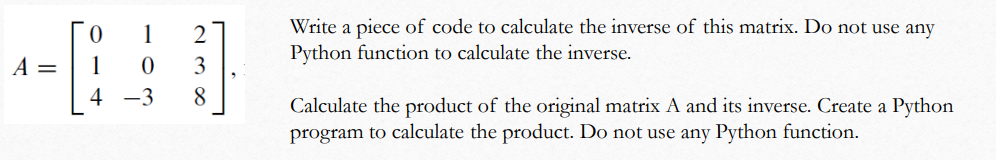

##Solution:

In [8]:
import numpy as np
#Define matrix
matrix = ([[0, 1, 2],
          [1, 0, 3],
          [4, -3, 8]])
for row in matrix:
  print(row)

[0, 1, 2]
[1, 0, 3]
[4, -3, 8]


To calculate inverse of matrix:


*   Define the inverse_matrix() function, which takes the matrix as a parameter.
*   Verify that the matrix passed is a square matrix because matrices other than square matrices cannot be inverted.
*   Check if the matrix is non-singular  using the determinant() function.
*   Augment the matrix with the identity matrix.
*   Perform the Gauss-Jordan elimination method.
*   Extract the inverse matrix from the augmented matrix.

In [6]:
def determinant(matrix):
    # Base case for 2x2 matrix
    if len(matrix) == 2:
        return matrix[0][0] * matrix[1][1] - matrix[0][1] * matrix[1][0]

    det = 0
    for i in range(len(matrix)):
        sub_matrix = [row[:i] + row[i+1:] for row in matrix[1:]]
        det += (-1) ** i * matrix[0][i] * determinant(sub_matrix)
    return det

def inverse_matrix(matrix):
    # Verify if the matrix is square
    n = len(matrix)
    if n != len(matrix[0]):
        raise ValueError("Matrix must be square to calculate its inverse")

    # Check if the matrix is non-singular
    if determinant(matrix) == 0:
        raise ValueError("Matrix is singular, its inverse does not exist")

    # Augment the matrix with the identity matrix
    augmented_matrix = [row + [int(i == j) for j in range(n)] for i, row in enumerate(matrix)]
    print("Augmented matrix:")
    for row in augmented_matrix:
        print(row)
    print()

    # Perform Gauss-Jordan elimination
    for i in range(n):
        # Find pivot row
        pivot_row = max(range(i, n), key=lambda r: abs(augmented_matrix[r][i]))
        augmented_matrix[i], augmented_matrix[pivot_row] = augmented_matrix[pivot_row], augmented_matrix[i]

        # Scale pivot row
        pivot = augmented_matrix[i][i]
        augmented_matrix[i] = [element / pivot for element in augmented_matrix[i]]

        # Eliminate other rows
        for j in range(n):
            if j != i:
                factor = augmented_matrix[j][i]
                augmented_matrix[j] = [augmented_matrix[j][k] - factor * augmented_matrix[i][k] for k in range(2*n)]
        print("Transformation:", i+1)
        for row in augmented_matrix:
          print(row)
        print()

    # Extract the inverse matrix
    inverse = [row[n:] for row in augmented_matrix]
    return inverse



try:
    inv = inverse_matrix(matrix)
    print("Inverse of the matrix:")
    for row in inv:
        print(row)
except ValueError as e:
    print(e)


Augmented matrix:
[0, 1, 2, 1, 0, 0]
[1, 0, 3, 0, 1, 0]
[4, -3, 8, 0, 0, 1]

Transformation: 1
[1.0, -0.75, 2.0, 0.0, 0.0, 0.25]
[0.0, 0.75, 1.0, 0.0, 1.0, -0.25]
[0.0, 1.0, 2.0, 1.0, 0.0, 0.0]

Transformation: 2
[1.0, 0.0, 3.5, 0.75, 0.0, 0.25]
[0.0, 1.0, 2.0, 1.0, 0.0, 0.0]
[0.0, 0.0, -0.5, -0.75, 1.0, -0.25]

Transformation: 3
[1.0, 0.0, 0.0, -4.5, 7.0, -1.5]
[0.0, 1.0, 0.0, -2.0, 4.0, -1.0]
[-0.0, -0.0, 1.0, 1.5, -2.0, 0.5]

Inverse of the matrix:
[-4.5, 7.0, -1.5]
[-2.0, 4.0, -1.0]
[1.5, -2.0, 0.5]


Matrix Multiplication:

In [10]:
def matrix_product(matrix1, matrix2):
    # Check if columns of matrix1 is equal to matrix2
    if len(matrix1[0]) != len(matrix2):
        raise ValueError("Matrices are not compatible for multiplication")

    # Initialize the result matrix with zeros
    result = [[0 for _ in range(len(matrix2[0]))] for _ in range(len(matrix1))]

    # Perform matrix multiplication
    for i in range(len(matrix1)):
        for j in range(len(matrix2[0])):
            for k in range(len(matrix2)):
                result[i][j] += matrix1[i][k] * matrix2[k][j]

    return result



try:
    product = matrix_product(matrix, inv)
    print("Product of the matrices:")
    for row in product:
        print(row)
except ValueError as e:
    print(e)


Product of the matrices:
[1.0, 0.0, 0.0]
[0.0, 1.0, 0.0]
[0.0, 0.0, 1.0]
